# Data Visualization for Baywheels Dataset
## by (Prerna Bhand)

## Investigation Overview

The BayWheels Dataset (Formerly called as Ford GoBike Dataset) is a collection of trips from various drivers from several years. This presentation is based on dataset from 2019.
The aim of this presentation is to present the insights of the data exploration and visualization (attached in the DataVisualization.ipynb in the project directory).


## Dataset Overview

The BayWheels Dataset (Formerly called as Ford GoBike Dataset) is a collection of trips from various drivers from several years.
Each trip is anonymized and includes:

1. Trip Duration (seconds)
2. Start Time and Date
3. End Time and Date
4. Start Station ID
5. Start Station Name
6. Start Station Latitude
7. Start Station Longitude
8. End Station ID
9. End Station Name
10. End Station Latitude
11. End Station Longitude
12. Bike ID
13. User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)


In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [34]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_baywheel.csv', low_memory = False)
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered= True, categories = week_order)
df['dayofweek_start'] = df['dayofweek_start'].astype(ordered_cat)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [18]:
df.head(20)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_mins,day_start,dayofweek_start,month_start,day_end,dayofweek_end,month_end
0,2019-07-04 14:31:11,2019-07-04 14:42:20,425.0,Bird Ave at Willow St,37.311284,-121.896325,415.0,Delmas Ave at Virginia St,37.319757,-121.892999,630873,Customer,app,11,4,Thursday,7,4,Thursday,7
1,2019-07-04 20:27:35,2019-07-04 20:31:36,425.0,Bird Ave at Willow St,37.311284,-121.896325,425.0,Bird Ave at Willow St,37.311284,-121.896325,892319,Customer,app,4,4,Thursday,7,4,Thursday,7
2,2019-07-04 13:22:24,2019-07-04 13:33:27,425.0,Bird Ave at Willow St,37.311284,-121.896325,296.0,5th St at Virginia St,37.325998,-121.877120,656863,Subscriber,app,11,4,Thursday,7,4,Thursday,7
3,2019-07-04 12:14:14,2019-07-04 12:41:29,425.0,Bird Ave at Willow St,37.311284,-121.896325,425.0,Bird Ave at Willow St,37.311284,-121.896325,892319,Customer,app,27,4,Thursday,7,4,Thursday,7
4,2019-07-13 15:24:46,2019-07-13 15:35:06,425.0,Bird Ave at Willow St,37.311284,-121.896325,312.0,San Jose Diridon Station,37.329732,-121.901782,664682,Customer,app,10,13,Saturday,7,13,Saturday,7
5,2019-07-04 09:48:42,2019-07-04 09:59:07,425.0,Bird Ave at Willow St,37.311284,-121.896325,425.0,Bird Ave at Willow St,37.311284,-121.896325,656863,Customer,app,10,4,Thursday,7,4,Thursday,7
6,2019-07-21 17:09:20,2019-07-21 18:34:11,425.0,Bird Ave at Willow St,37.311284,-121.896325,425.0,Bird Ave at Willow St,37.311284,-121.896325,141744,Customer,app,84,21,Sunday,7,21,Sunday,7
7,2019-07-30 07:04:23,2019-07-30 07:06:46,425.0,Bird Ave at Willow St,37.311284,-121.896325,425.0,Bird Ave at Willow St,37.311284,-121.896325,141744,Subscriber,app,2,30,Tuesday,7,30,Tuesday,7
8,2019-07-02 14:06:02,2019-07-02 14:34:34,425.0,Bird Ave at Willow St,37.311284,-121.896325,401.0,Skyport Dr at Technology Dr,37.365227,-121.916815,421933,Subscriber,app,28,2,Tuesday,7,2,Tuesday,7
9,2019-07-21 10:39:46,2019-07-21 10:51:46,407.0,Bird Ave at Coe Ave,37.315158,-121.897833,278.0,The Alameda at Bush St,37.331932,-121.904888,614329,Subscriber,app,12,21,Sunday,7,21,Sunday,7


In [28]:
df.dayofweek_start.head(10)

0    Thursday
1    Thursday
2    Thursday
3    Thursday
4    Saturday
5    Thursday
6      Sunday
7     Tuesday
8     Tuesday
9      Sunday
Name: dayofweek_start, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

### Number of rides per weekday
This visualization will show how many rides are there through the week, to get a sense of high traffic and low traffic days. 

Text(0, 0.5, 'Count')

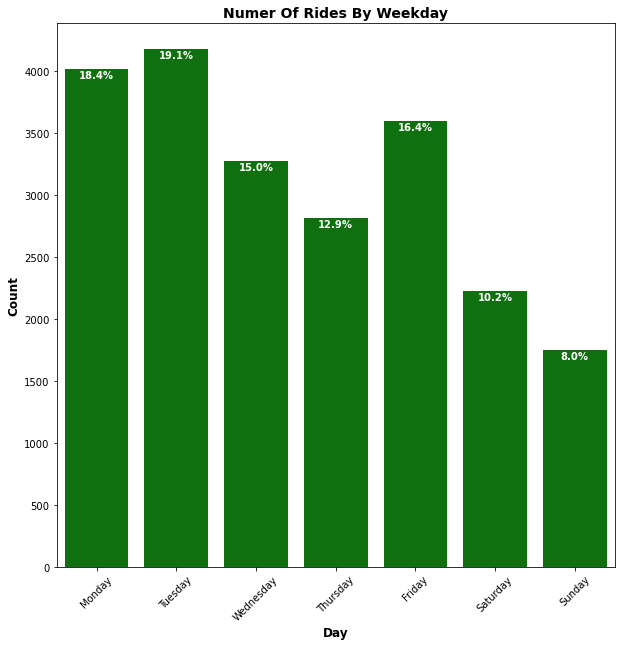

In [30]:
plt.figure(figsize=[10, 10])

sb.countplot(data = df, x='dayofweek_start', color = 'green')


n_points = df.shape[0]
cat_counts = df['dayofweek_start'].value_counts()
locs, labels = plt.xticks(rotation = 45)

for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    plt.text(loc, count-8, pct_string, ha = 'center', va='top', color = 'w', weight = 'heavy')
    
plt.title('Numer of rides by weekday'.title(),
               fontsize = 14, weight = "bold")

plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")

plt.ylabel('Count'.title(),
               fontsize = 12, weight = "bold")

## Average Ride duration 

It would be interesting to see what is the average duration of a ride. The ride duration ranges from seconds to minutes, hence Logarithm10 is applied for scaling the duration correctly. From the graph, it seems the average duration of rides here is from 5 to 20 minutes.

Text(0, 0.5, 'Count Of Rides')

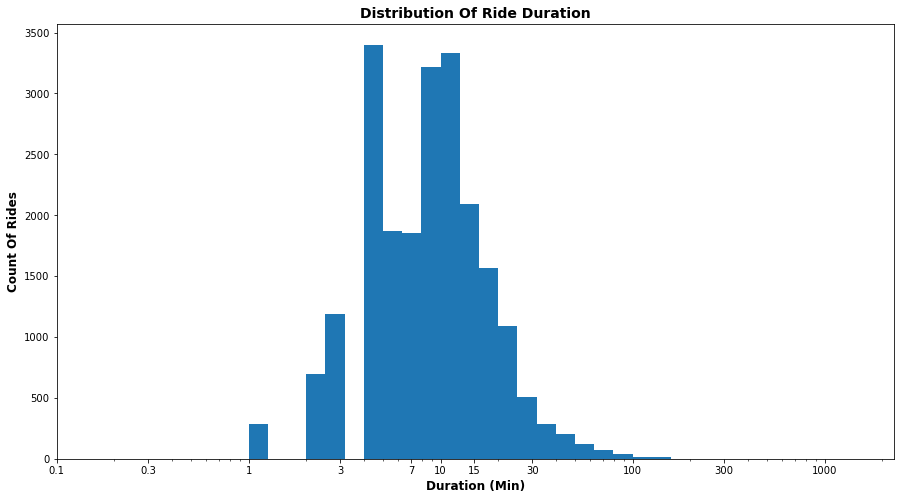

In [35]:
plt.figure(figsize=[15, 8])
bins = 10 ** np.arange(0,3.15+0.1,0.1)
ticks = [0.1,0.3,1,3,7,10,15,30,100,300,1000]

labels = ['{}'.format(v) for v in ticks]

plt.hist(data = df, x = 'duration_mins', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);

plt.title("Distribution of ride duration".title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Duration (min)'.title(),
               fontsize = 12, weight = "bold")
plt.ylabel('Count of rides'.title(),
               fontsize = 12, weight = "bold")

## Rides per weekday

In this Visualization we will see how weekdays are related to ride duration.  Average ride durations are higher on weekends, indicating more leisure trips that may last longer than usual office trips on weekdays.


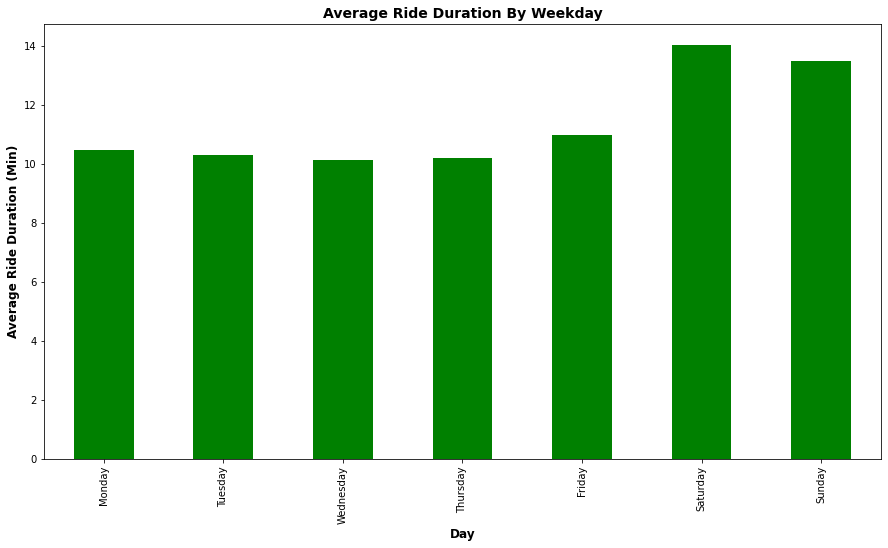

In [36]:
plt.figure(figsize=[15, 8])


df.groupby('dayofweek_start')['duration_mins'].mean().plot(kind = "bar", color = 'green');


plt.title("Average ride duration by weekday".title(),
               fontsize = 14, weight = "bold")

plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")

plt.ylabel('Average ride duration (min)'.title(),
               fontsize = 12, weight = "bold");

## BoxPlot Visualization of the ride durations through the week

The BoxPlot Visualization of the above Histogram will give us a sense of how the Average ride duration is spread.

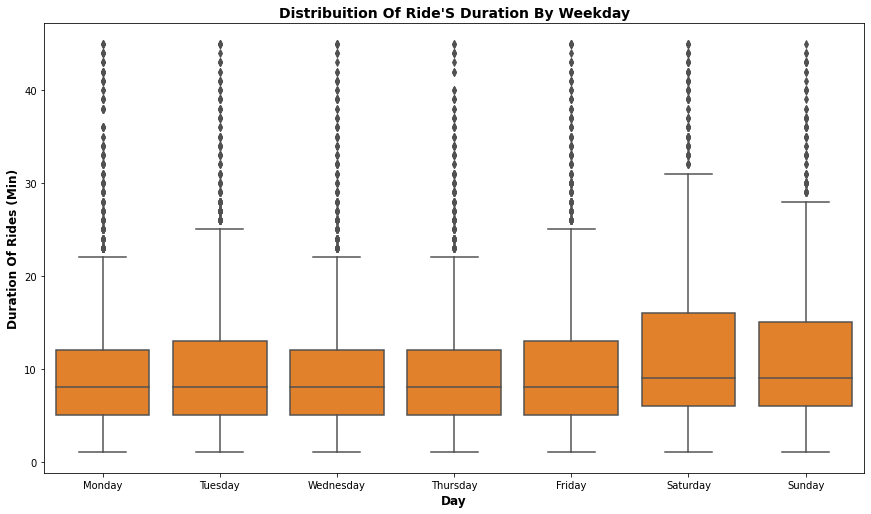

In [38]:
df_durationsub_45 = df.loc[df['duration_mins'] <= 45]
plt.figure(figsize=[14.70, 8.27])

base_color = sb.color_palette()[1]

sb.boxplot(data = df_durationsub_45, x = 'dayofweek_start', y = 'duration_mins',
              color = base_color);

# Add title and format it
plt.title("Distribuition of ride's duration by weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Duration of rides (min)'.title(),
               fontsize = 12, weight = "bold");

###  User type and the usage pattern
The following graph indicates Customers tend to have longer ride durations than Subscribers.


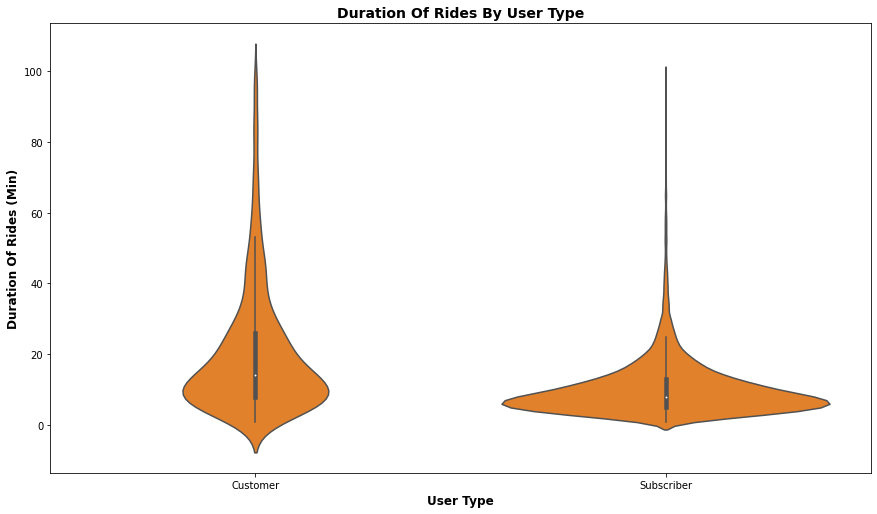

In [39]:
df_durationsub_100 = df.loc[df['duration_mins'] <= 100]
plt.figure(figsize=[14.70, 8.27])

base_color = sb.color_palette()[1]

sb.violinplot(data = df_durationsub_100, x = 'user_type', y = 'duration_mins',
              color = base_color)

# Add title and format it
plt.title("Duration of Rides by User Type".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Duration of rides (min)'.title(),
               fontsize = 12, weight = "bold");

### Relationship between weekday, number of rides and user types 
 
In the following graph, it is clear that the ride durations for customers tends to be higher than that of subscribers. They also tend to be much longer during fridays and saturdays. For subscribers, the ride duration stays same through the week and goes to slightly higher duration on weekend.

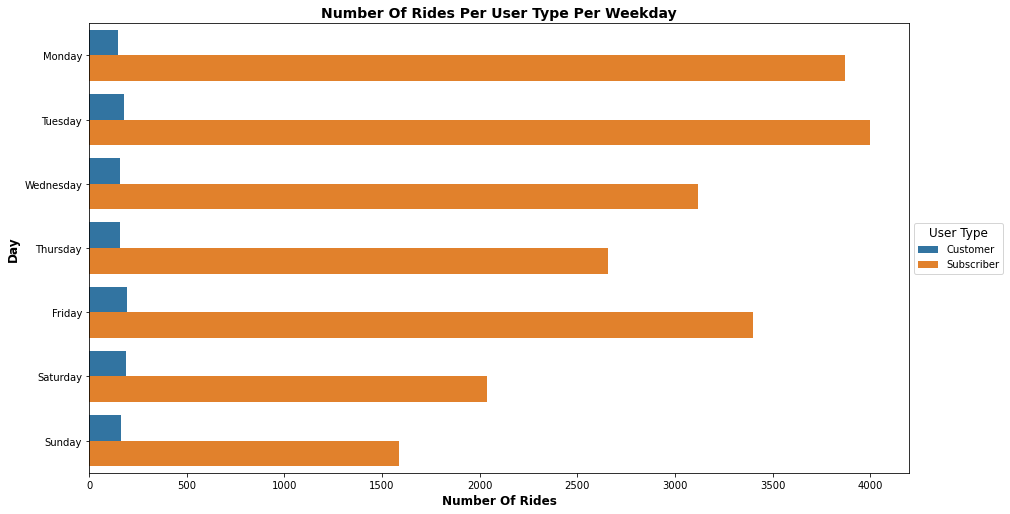

In [40]:
plt.figure(figsize=[14.70, 8.27])

sb.countplot(data = df, y='dayofweek_start', hue = 'user_type');


plt.title("Number of rides per user type per weekday".title(),
               fontsize = 14, weight = "bold")

plt.xlabel('Number of rides'.title(), fontsize = 12, weight = "bold")

plt.ylabel('Day'.title(),
               fontsize = 12, weight = "bold")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="User Type", title_fontsize = 12);

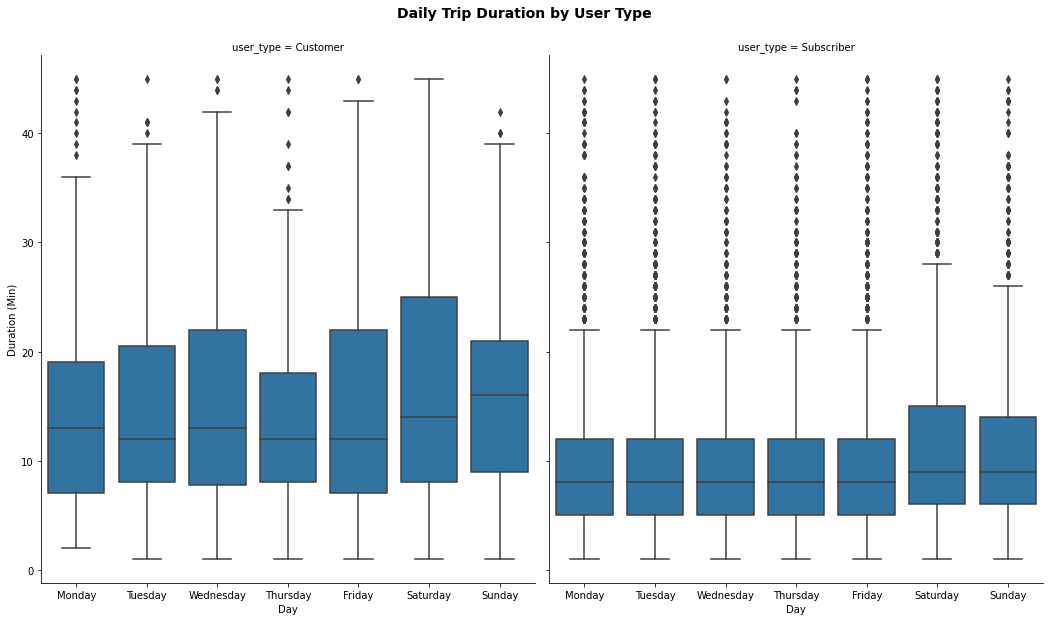

In [41]:
g = sb.FacetGrid(data = df_durationsub_45, col = 'user_type', height = 8.27, aspect = (14.70/2)/8.27)
g.map(sb.boxplot, 'dayofweek_start', 'duration_mins');

plt.suptitle("Daily Trip Duration by User Type", y = 1.04, fontsize = 14, weight = 'bold')

g.set_axis_labels('Day', 'Duration (Min)');

### Heatmap to visualize the three variables
Following graph shows highest ride duration for customers - 29 minutes. Subscribers do not have such variation in their ride durations.

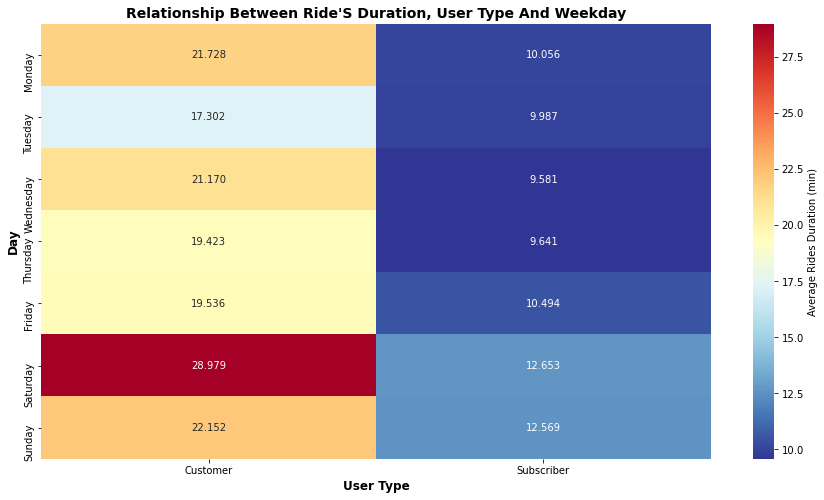

In [42]:
plt.figure(figsize=[15, 8])

cat_means = df.groupby(['user_type','dayofweek_start']).mean()['duration_mins']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'dayofweek_start', columns = 'user_type', 
                            values = 'duration_min_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average Rides Duration (min)'}, cmap = 'RdYlBu_r')


plt.title("Relationship between ride's duration, user type and weekday".title(),
               fontsize = 14, weight = "bold")

plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")

plt.ylabel('Day'.title(),
               fontsize = 12, weight = "bold");

## Conclusion
Through the analysis of the dataset, we observed that the two user types from BayWheel have differnt usage pattern. Customers have longer trips during the weekend than subscribers, where as subscribers have consistent duration of rides for their work-trips and their leisure trips are not as long as customers. 